
# Introduction




![](https://64.media.tumblr.com/d994c3b1c3adb94ac65692a599aae700/5866f6929b208337-cb/s540x810/bc492d78a4dc5a31fe7c5b42c1fff9bcd5938c9d.gif)


We always make big or small decisions. However, deciding something is not easy. Machines are also difficult to decide.
Even in this problem, we and the model always have to make difficult decisions. In particular, a more careful decision is required when a decision related to a person's life has to be made.

On what basis should the decision be made? In the end, we need to understand the dataset as much as possible and make the decision right through effective modeling. Let's start the difficult task.

We hope that the decision of us and the model will save many people.

## Features
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

----------------------------
# Setting UP

## Install Package 


**PyCaret** is an open-source, low-code machine learning library in Python that automates machine learning workflows.


In [ ]:
try:
  import pycaret
except:
  !pip install --upgrade pycaret
  # !pip install pycaret[full]


**Missingno** is an excellent and simple to use Python library that provides a series of visualisations
to understand the presence and distribution of missing data within a pandas dataframe.
This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.

In [ ]:
try:
  import missingno
except:
  !pip install missingno

**InterpretML** is an open-source package that incorporates state-of-the-art machine learning interpretability techniques under one roof.
With this package, you can train interpretable glassbox models and explain blackbox systems.
InterpretML helps you understand your model's global behavior, or understand the reasons behind individual predictions.


In [ ]:
try:
  import interpret
except:
  !pip install interpret

**Tune-sklearn** is a drop-in replacement for Scikit-Learn’s model selection module (GridSearchCV, RandomizedSearchCV) with cutting edge hyperparameter tuning techniques.

In [ ]:
try:
  import tune_sklearn
except:    
  !pip install tune-sklearn ray[tune]

## Import Package

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import PowerTransformer

sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

## Download Data

In [ ]:
import os.path
if not os.path.isfile('spaceship-titanic.zip'):
  !gdown --id 1Mt3sl-LxG-XLx2MGICDx7B9eKshZCNth
  !unzip 'spaceship-titanic.zip'


## Load Data

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')
space_df = pd.concat([train_data, test_data], ignore_index = True, sort = False)
tr_idx = space_df['Transported'].notnull()

<hr style="border: solid 3px blue;">

# EDA

## Anomaly Detection




![](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/8230004725_6338759eb3_o_crop-57552d1a7b9df6b9221d5c1fd342334f.jpg)



Before proceeding with EDA in earnest, anomaly detection is performed with a dataset. And, through this, we want to check which cases are judged as outliers and gain insight into EDA.

In [ ]:
!pip install pycaret[full]
# !pip install numba --upgrade
!pip install numba==0.53

In [ ]:
from pycaret.anomaly import *

In [ ]:
_ = pycaret.anomaly.setup(
    data=space_df[tr_idx],
    silent=True)

,Description,Value
0,session_id,5865
1,Original Data,"(8693, 14)"
2,Missing Values,True
3,Numeric Features,7
4,Categorical Features,7
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(8693, 15052)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [ ]:
knn = pycaret.anomaly.create_model('knn')

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
INFO:logs:create_model() succesfully completed......................................


------------------------------------------
Extracting top 5 outliers 

In [ ]:
knn_df = pycaret.anomaly.assign_model(knn)
abnormal_data = knn_df[knn_df.Anomaly == 1].sort_values(by='Anomaly_Score', ascending=False)
print("the size of anomaly = ",len(abnormal_data))
abnormal_data.head().style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Nearest Neighbors Detector
INFO:logs:Copying data
INFO:logs:(8693, 16)
INFO:logs:assign_model() succesfully completed......................................


the size of anomaly =  435


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Anomaly,Anomaly_Score
2067,2215_01,Europa,False,A/27/S,55 Cancri e,41.000000,True,0.000000,29813.000000,0.000000,1257.000000,6.000000,Pulchib Quidedbolt,True,1,26073.973556
1213,1292_01,Europa,False,B/55/S,55 Cancri e,31.000000,True,0.000000,27723.000000,3.000000,202.000000,3146.000000,Scharab Conale,True,1,24105.288403
5722,6064_01,Europa,False,C/186/P,55 Cancri e,68.000000,False,125.000000,13437.000000,0.000000,22408.000000,17.000000,Markar Radisiouss,False,1,22808.375348
5619,5977_02,Europa,False,B/230/S,55 Cancri e,57.000000,False,200.000000,9.000000,0.000000,nan,24133.000000,nan,False,1,22532.643168
3538,3796_01,Europa,False,B/121/P,55 Cancri e,33.000000,False,90.000000,26830.000000,0.000000,27.000000,703.000000,Dhena Semageary,True,1,22455.425892


<span style="color:Blue"> Observation:
* There are a total of 435 outliers.
* In cases where HomePlanet is Europa and Destination is 55 Cancri e, there are many cases where anomaly was decided.

In [ ]:
# plt.style.use("dark_background")
# plot_model(knn,plot='umap')

In [ ]:
plot_model(knn,plot='tsne')

INFO:logs:Rendering Visual


In [ ]:
space_df.head().T.style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


,0,1,2,3,4
PassengerId,0001_01,0002_01,0003_01,0003_02,0004_01
HomePlanet,Europa,Earth,Europa,Europa,Earth
CryoSleep,False,False,False,False,False
Cabin,B/0/P,F/0/S,A/0/S,A/0/S,F/1/S
Destination,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e
Age,39.000000,24.000000,58.000000,33.000000,16.000000
VIP,False,False,True,False,False
RoomService,0.000000,109.000000,43.000000,0.000000,303.000000
FoodCourt,0.000000,9.000000,3576.000000,1283.000000,70.000000
ShoppingMall,0.000000,25.000000,0.000000,371.000000,151.000000


## Checking Missing Values



![](https://miro.medium.com/max/640/0*10yDGnSUYVYTuHR-.jpg)


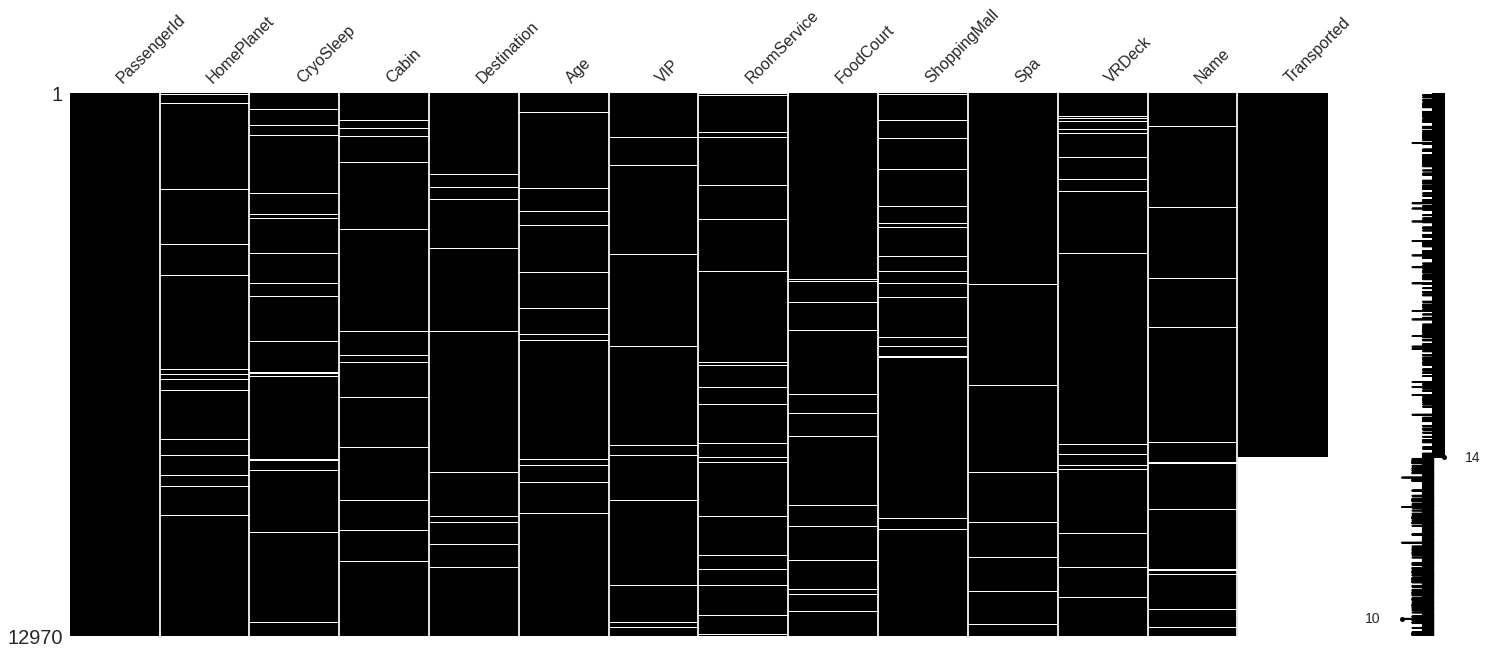

In [ ]:
import missingno as msno
msno.matrix(space_df,color=(0, 0, 0))

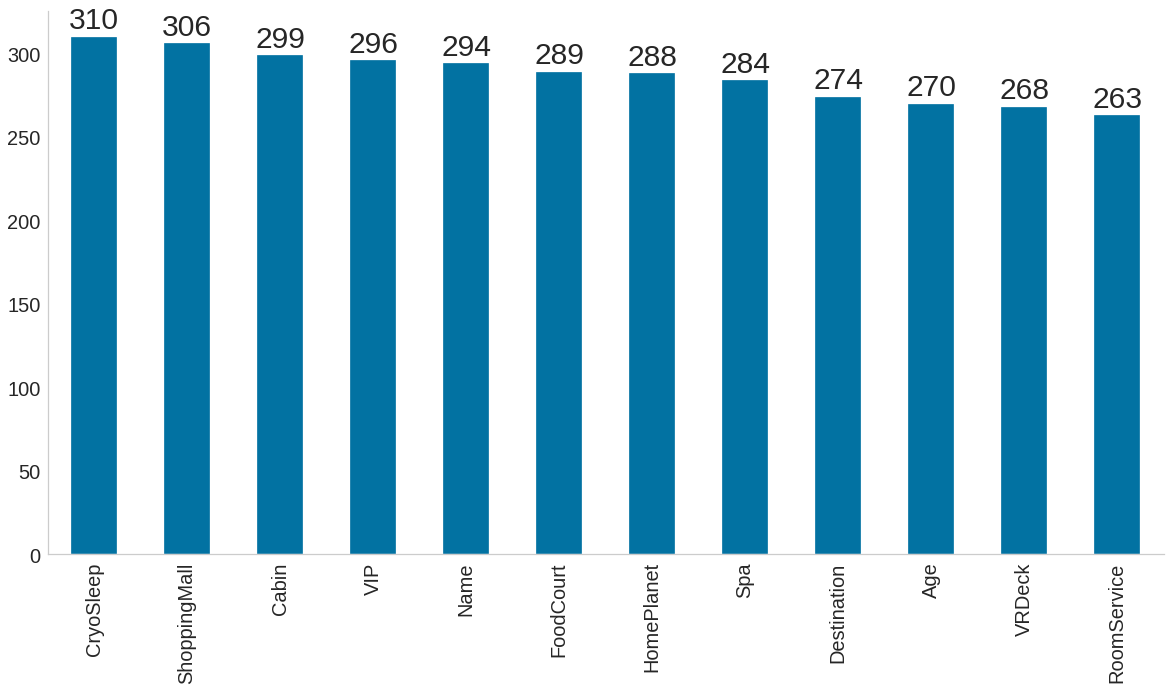

In [ ]:
isnull_series = space_df.loc[:,:'Name'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))

ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 30)
sns.despine()

<span style="color:Blue"> Observation:
* Unfortunately, there are many missing values. How the missing values ​​are filled is expected to have a big influence on the model performance.

## Checking Target Balance

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Not-Transported','Transported']
values = space_df['Transported'].value_counts()/space_df['Transported'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Target Blance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<span style="color:Blue"> Observation:

* Target is well balanced.

## Checking Data Type


![](http://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1_1024x1024.png?v=1497575369)



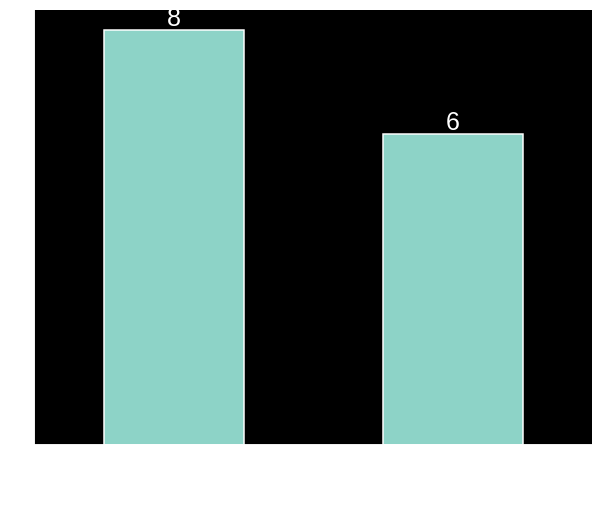

In [ ]:
plt.figure(figsize = (10,8))
with plt.rc_context({'figure.facecolor':'black'}):
    sns.set(style="ticks", context="talk",font_scale = 1)
    plt.style.use("dark_background")
    ax = space_df.dtypes.value_counts().plot(kind='bar',fontsize=20)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 25)
    sns.despine()


### Categorical Features


> In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.[1] In computer science and some branches of mathematics, categorical variables are referred to as enumerations or enumerated types. Commonly (though not in this article), each of the possible values of a categorical variable is referred to as a level. The probability distribution associated with a random categorical variable is called a categorical distribution.

Ref: https://en.wikipedia.org/wiki/Categorical_variable

#### Name

Let's decide the name as a unique value and drop it.

In [ ]:
space_df.drop(['Name'],axis=1,inplace=True,errors='ignore')

#### PassengerId 



A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. **People in a group are often family members, but not always.**

Let's make a group feature.

In [ ]:
def extract_group(s):
    return s.split('_')[1]

space_df['Group'] = space_df['PassengerId'].apply(extract_group).astype(int)

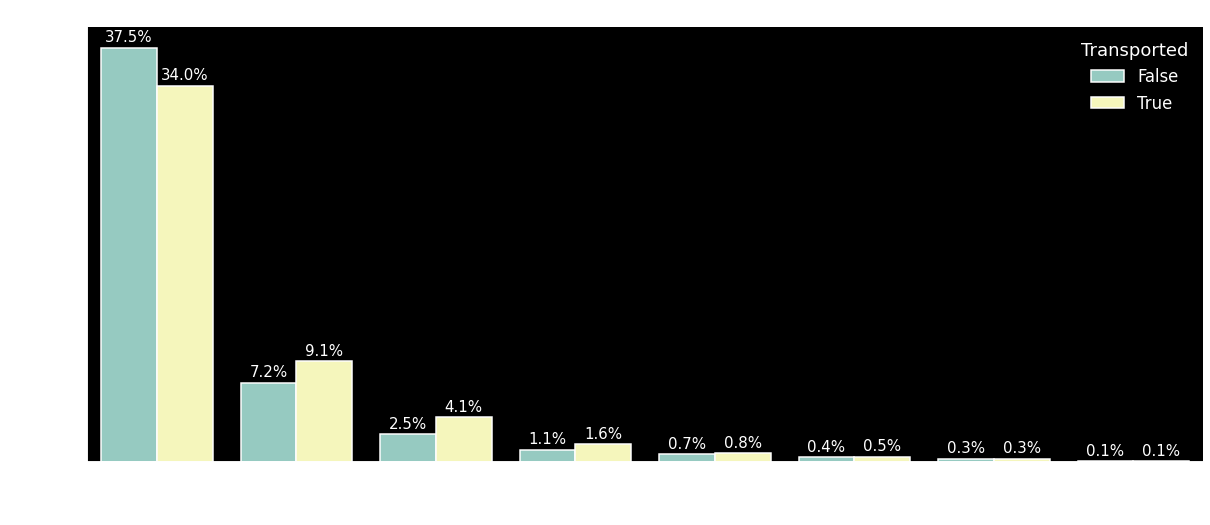

In [ ]:
total_cnt = space_df[tr_idx]['Transported'].count()
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Group",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Group/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* People in Group 1 were relatively untransported.

In [ ]:
space_df.drop(['PassengerId'],axis=1,inplace=True,errors='ignore')

#### HomePlanet



The planet the passenger departed from, typically their planet of permanent residence.

In [ ]:
space_df['Has_HomePlanet'] = space_df['HomePlanet'].isnull().astype(int)

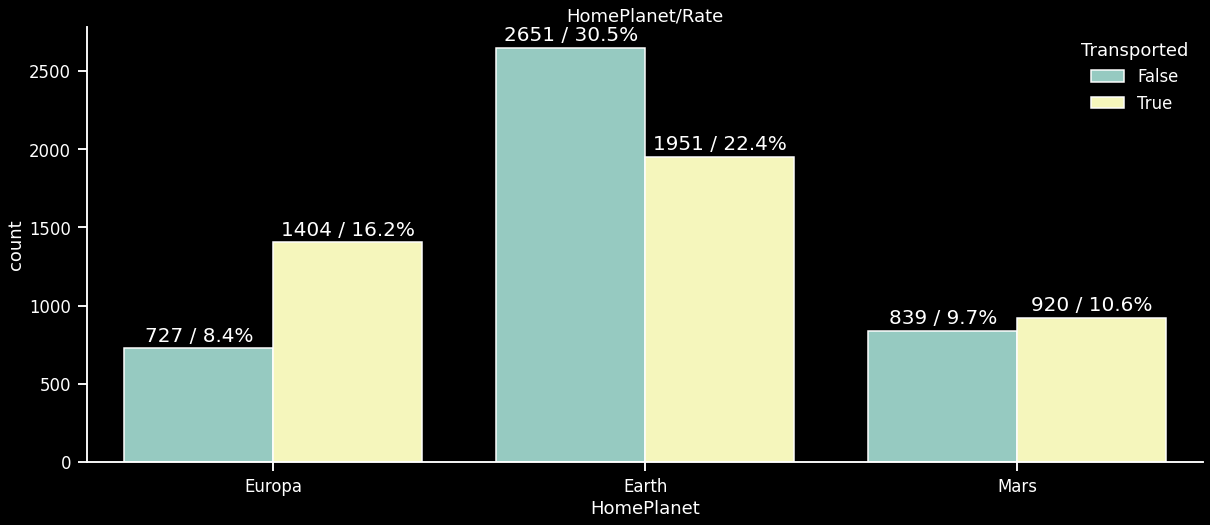

In [ ]:
total_cnt = space_df[tr_idx]['Transported'].count()
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="HomePlanet",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('HomePlanet/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:

* Relatively many people from Earth are not transported.

#### CryoSleep



![](https://qph.fs.quoracdn.net/main-qimg-30ac22fbc0cff552d0db1094338da8f2-pjlq)


Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [ ]:
space_df['Has_CryoSleep'] = space_df['CryoSleep'].isnull().astype(int)

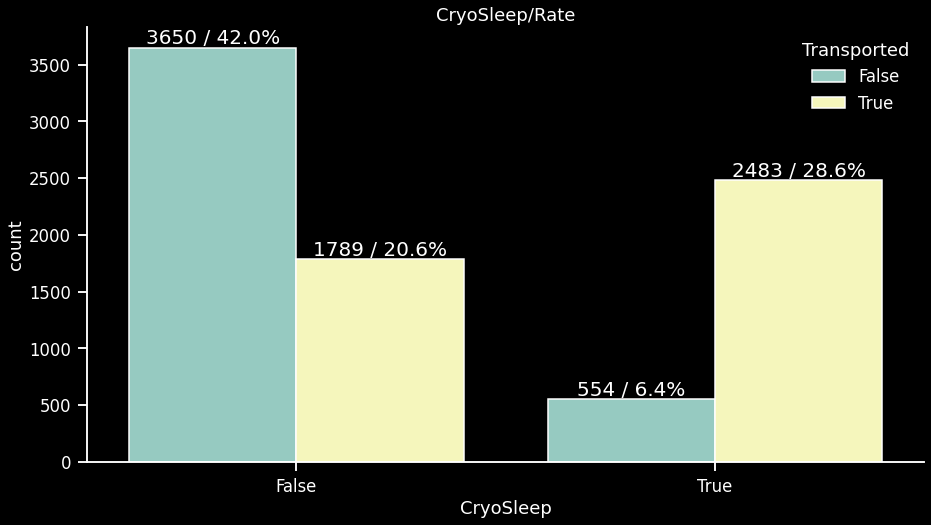

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="CryoSleep",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('CryoSleep/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:
* People doing CryoSleep were more transported.

#### Destination


The planet the passenger will be debarking to.


In [ ]:
space_df['Has_Destination'] = space_df['Destination'].isnull().astype(int)

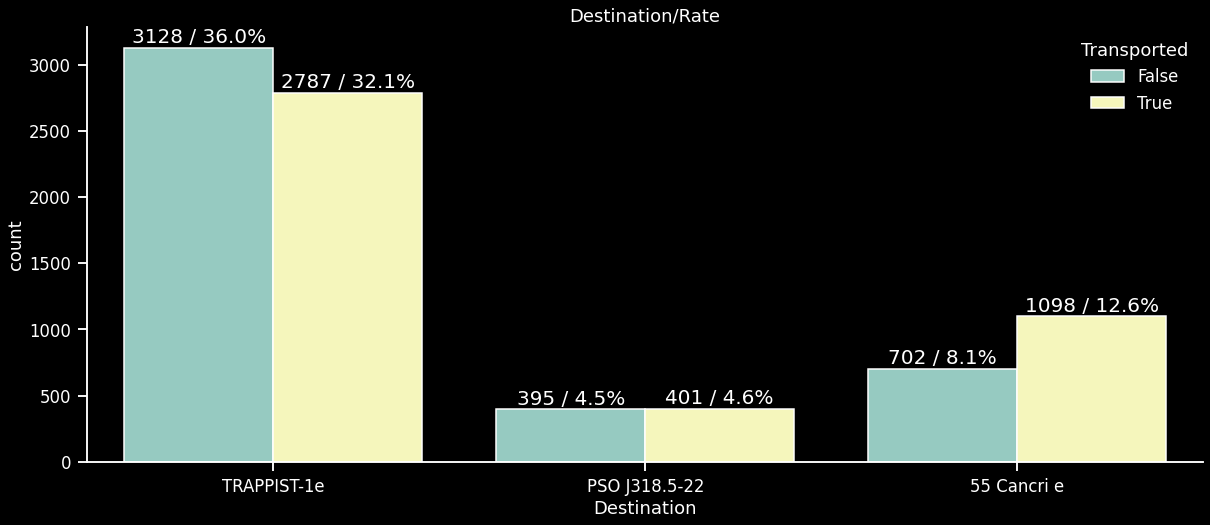

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Destination",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Destination/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

#### Cabin



The cabin number where the passenger is staying. Takes the form **deck/num/side**, where side can be either P for Port or S for Starboard.

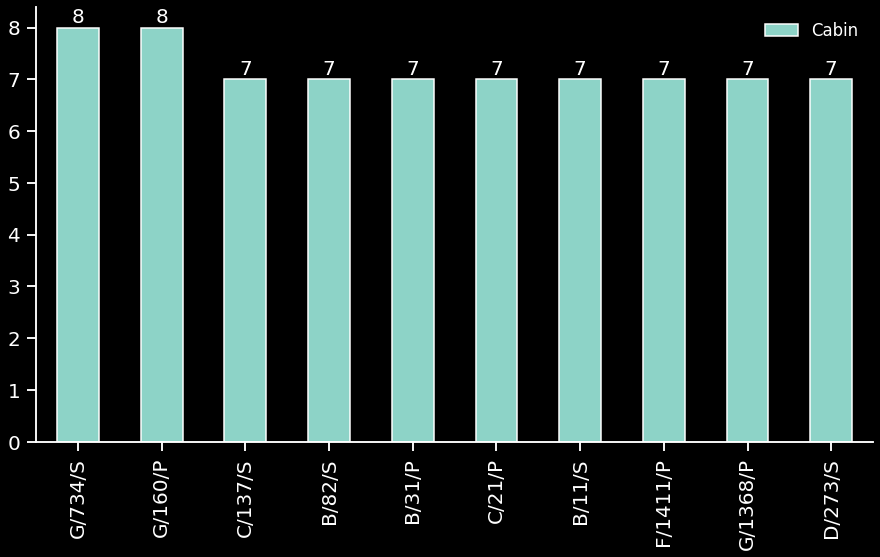

In [ ]:
plt.figure(figsize=(15,8))
ax = space_df['Cabin'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20)
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 20)
sns.despine()

In [ ]:
space_df['Has_Cabin'] = space_df['Cabin'].isnull().astype(int)

In [ ]:
space_df['Cabin'].fillna('None/None/None', inplace=True)

In [ ]:
def extract_first(s):
    return s.split('/')[0]
def extract_mid(s):
    return s.split('/')[1]
def extract_last(s):
    return s.split('/')[2]

space_df['Deck'] = space_df['Cabin'].apply(extract_first)
space_df['Num'] = space_df['Cabin'].apply(extract_mid)
space_df['Side'] = space_df['Cabin'].apply(extract_last)

#### Deck

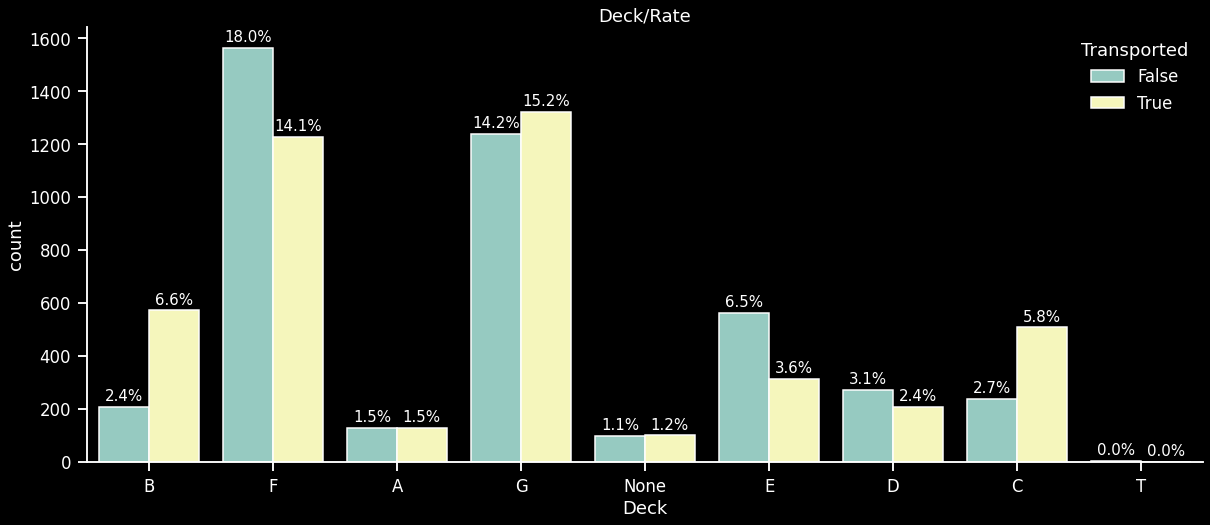

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Deck",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Deck/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 40, f'{height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* There are many cases where people on the B, G, and C Decks are transported.
* There are many cases where people in F,E,D Decks are not transported.

#### Side

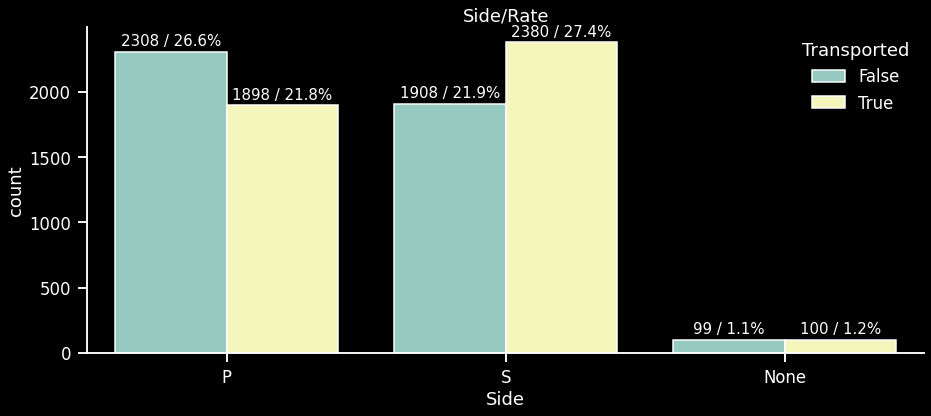

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Side",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Side/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* There are many cases where people on the S side are transported.

In [ ]:
cat_cols = ['Deck','Num','Side']
space_df[cat_cols].nunique()

Deck       9
Num     1895
Side       3
dtype: int64

<span style="color:Blue"> Observation:
* The number of Num/Deck levels is large. It seems better to do label encoding than one-hot encoding.

In [ ]:
for c in cat_cols:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    space_df[c]= le.fit_transform(space_df[c])

In [ ]:
space_df.drop('Cabin',axis=1,inplace=True)

#### VIP

Whether the passenger has paid for special VIP service during the voyage.

In [ ]:
space_df['Has_VIP'] = space_df['VIP'].isnull().astype(int)

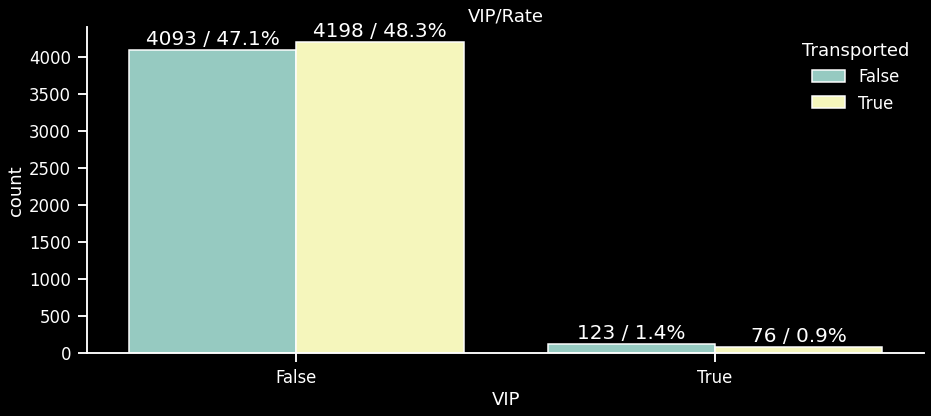

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="VIP",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('VIP/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 150, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:
* It doesn't seem like transporte has become much special just because you receive VIP service.

### Numerical Features


> Numeric variables have values that describe a measurable quantity as a number, like 'how many' or 'how much'. Therefore numeric variables are quantitative variables.

> Numeric variables may be further described as either continuous or discrete:
> * A continuous variable is a numeric variable. Observations can take any value between a certain set of real numbers. The value given to an observation for a continuous variable can include values as small as the instrument of measurement allows. Examples of continuous variables include height, time, age, and temperature.
> * A discrete variable is a numeric variable. Observations can take a value based on a count from a set of distinct whole values. A discrete variable cannot take the value of a fraction between one value and the next closest value. Examples of discrete variables include the number of registered cars, number of business locations, and number of children in a family, all of of which measured as whole units (i.e. 1, 2, 3 cars).

Ref: https://www.abs.gov.au/

In [ ]:
def display_stat(df,feature):
    mean = df[feature].mean()
    std = df[feature].std()
    skew = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [ ]:
def plot_histgram(df,feature):    
    fig = px.histogram(df, x=feature,
                       color="Transported", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},    
        paper_bgcolor="black",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

#### Age

First, let's check the correlation between Age and other features.

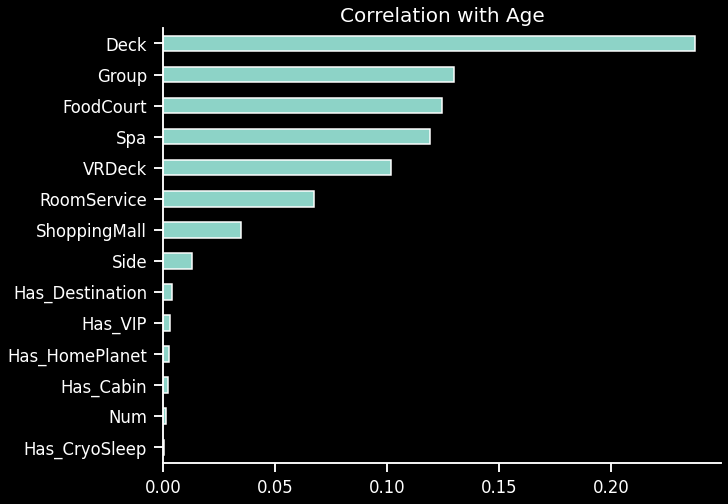

In [ ]:
corr=space_df.corr()
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize=(10, 8))
abs(corr['Age']).sort_values()[:-1].plot.barh()
plt.title('Correlation with Age',fontsize=20)
sns.despine()

<span style="color:Blue"> Observation:
* The correlation between Age and Deck is higher than other features. 

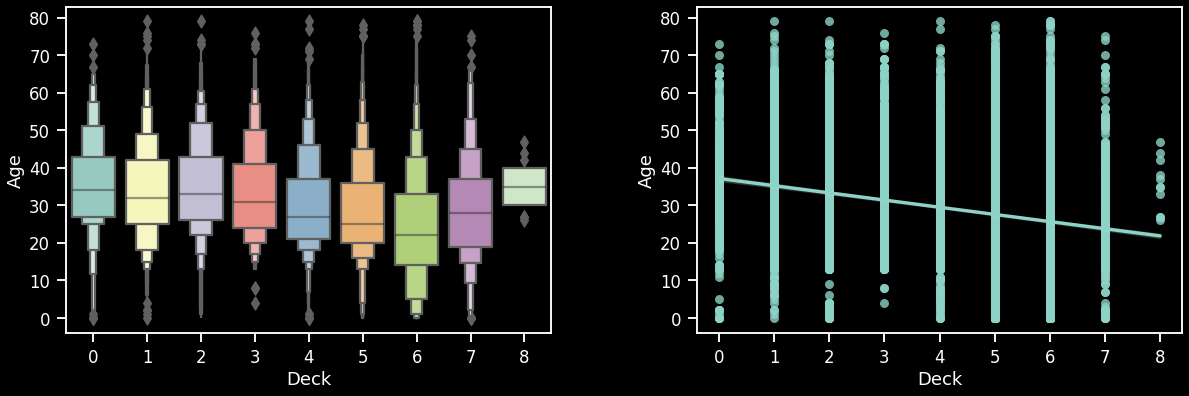

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=space_df, x='Deck',y='Age')
plt.subplot(1,2,2)
sns.regplot(data=space_df, x='Deck',y='Age')

<span style="color:Blue"> Observation:
* The people on deck 6 appear to be younger than the people on the other decks.

In [ ]:
plot_histgram(space_df[tr_idx],'Age')
display_stat(space_df[tr_idx],'Age')

mean: 28.8279, std: 14.4890, skew: 0.4191, kurtosis: 0.1019 


In [ ]:
space_df['Has_Age'] = space_df['Age'].isnull().astype(int)

Fill in the missing values ​​with the median value for age for each deck.

In [ ]:
space_df['Age'] = space_df['Age'].fillna(space_df.groupby('Deck')['Age'].transform('median'))

In [ ]:
plot_histgram(space_df[tr_idx],'Age')
display_stat(space_df[tr_idx],'Age')

mean: 28.7790, std: 14.3557, skew: 0.4315, kurtosis: 0.1587 


#### RoomService

In [ ]:
space_df['Has_RoomService'] = space_df['RoomService'].isnull().astype(int)

In [ ]:
display_stat(space_df[tr_idx],'RoomService')

mean: 224.6876, std: 666.7177, skew: 6.3330, kurtosis: 65.2738 


In [ ]:
plot_histgram(space_df[tr_idx],'RoomService')
display_stat(space_df[tr_idx],'RoomService')

mean: 224.6876, std: 666.7177, skew: 6.3330, kurtosis: 65.2738 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
space_df[['RoomService_pt']] = pt.fit_transform(space_df[['RoomService']])

In [ ]:
plot_histgram(space_df[tr_idx],'RoomService_pt')
display_stat(space_df[tr_idx],'RoomService_pt')
space_df.drop('RoomService_pt',axis=1,inplace=True)

mean: -0.0029, std: 0.9992, skew: 0.8107, kurtosis: -1.2456 


#### FoodCourt

In [ ]:
space_df['Has_FoodCourt'] = space_df['FoodCourt'].isnull().astype(int)

In [ ]:
plot_histgram(space_df[tr_idx],'FoodCourt')
display_stat(space_df[tr_idx],'FoodCourt')

mean: 458.0772, std: 1611.4892, skew: 7.1022, kurtosis: 73.3072 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [ ]:
space_df[['FoodCourt_pt']] = pt.fit_transform(space_df[['FoodCourt']])

In [ ]:
plot_histgram(space_df[tr_idx],'FoodCourt_pt')
display_stat(space_df[tr_idx],'FoodCourt_pt')
space_df.drop('FoodCourt_pt',axis=1,inplace=True)

mean: 0.0014, std: 0.9998, skew: 0.7645, kurtosis: -1.3071 


#### ShoppingMall

In [ ]:
space_df['Has_ShoppingMall'] = space_df['ShoppingMall'].isnull().astype(int)

In [ ]:
plot_histgram(space_df[tr_idx],'ShoppingMall')
display_stat(space_df[tr_idx],'ShoppingMall')

mean: 173.7292, std: 604.6965, skew: 12.6276, kurtosis: 328.8709 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [ ]:
space_df[['ShoppingMall_pt']] = pt.fit_transform(space_df[['ShoppingMall']])

In [ ]:
plot_histgram(space_df[tr_idx],'ShoppingMall_pt')
display_stat(space_df[tr_idx],'ShoppingMall_pt')
space_df.drop('ShoppingMall_pt',axis=1,inplace=True)

mean: -0.0026, std: 0.9983, skew: 0.8386, kurtosis: -1.1882 


#### Spa

In [ ]:
space_df['Has_Spa'] = space_df['Spa'].isnull().astype(int)

In [ ]:
display_stat(space_df[tr_idx],'Spa')

mean: 311.1388, std: 1136.7055, skew: 7.6360, kurtosis: 81.2021 


In [ ]:
plot_histgram(space_df[tr_idx],'Spa')
display_stat(space_df[tr_idx],'Spa')

mean: 311.1388, std: 1136.7055, skew: 7.6360, kurtosis: 81.2021 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [ ]:
space_df[['Spa_pt']] = pt.fit_transform(space_df[['Spa']])

In [ ]:
plot_histgram(space_df[tr_idx],'Spa_pt')
display_stat(space_df[tr_idx],'Spa_pt')
space_df.drop('Spa_pt',axis=1,inplace=True)

mean: 0.0006, std: 1.0012, skew: 0.7200, kurtosis: -1.3584 


#### VRDeck

In [ ]:
space_df['Has_VRDeck'] = space_df['VRDeck'].isnull().astype(int)

In [ ]:
display_stat(space_df[tr_idx],'VRDeck')

mean: 304.8548, std: 1145.7172, skew: 7.8197, kurtosis: 86.0112 


In [ ]:
plot_histgram(space_df[tr_idx],'VRDeck')
display_stat(space_df[tr_idx],'VRDeck')

mean: 304.8548, std: 1145.7172, skew: 7.8197, kurtosis: 86.0112 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [ ]:
space_df[['VRDeck_pt']] = pt.fit_transform(space_df[['VRDeck']])

In [ ]:
plot_histgram(space_df[tr_idx],'VRDeck_pt')
display_stat(space_df[tr_idx],'VRDeck_pt')
space_df.drop('VRDeck_pt',axis=1,inplace=True)

mean: 0.0085, std: 1.0036, skew: 0.7838, kurtosis: -1.2770 


In [ ]:
space_df['TotalSpend'] = space_df['VRDeck'] + space_df['Spa'] + space_df['ShoppingMall'] + space_df['FoodCourt'] + space_df['RoomService']

## Non-Linear Transformation 


![](https://www.researchgate.net/profile/Chun-Fung-2/publication/224678404/figure/fig1/AS:646829247057921@1531227518360/llustration-of-Non-linear-Data-Transformation-3-Proposed-Framework-31-Previous-Work.png)

In [ ]:
transform_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']
space_df[transform_features] = pt.fit_transform(space_df[transform_features])

<hr style="border: solid 3px blue;">

# Machine Learning




![](https://cdn.dribbble.com/users/1373613/screenshots/5436457/plexus___3.gif)

In [ ]:
num_cols = space_df.select_dtypes(exclude = ['object', 'bool']).columns.tolist()

In [ ]:
from pycaret.classification import *

## Making Pipeline before Training



![](https://signal-to-noise.xyz/static/images/pipes.jpg)


In [ ]:
_ = setup(data = space_df[tr_idx], 
      target = 'Transported',
      numeric_features = num_cols,
      silent = True,
      remove_multicollinearity = True,
      ignore_low_variance = True,
      imputation_type = 'simple',
      categorical_imputation = 'mode',
      numeric_imputation = 'median' )

,Description,Value
0,session_id,4620
1,Target,Transported
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(8693, 27)"
5,Missing Values,True
6,Numeric Features,22
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'RoomService',
                                                          'FoodCourt',
                                                          'ShoppingMall', 'Spa',
                                                          'VRDeck', 'Group',
                                                          'Has_HomePlanet',
                                                          'Has_CryoSleep',
                                                          'Has_Destination',
                                       

In [ ]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

## Comparing Models

In [ ]:
# top3 = compare_models(sort='Accuracy',n_select = 3
#                       ,exclude = ['knn', 'svm','ridge','nb','dummy','qda','xgboost'] )
top3 = compare_models(sort='Accuracy',n_select = 3
                      ,exclude = ['knn', 'svm','ridge','nb','dummy','qda'] )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8061,0.8969,0.8075,0.8104,0.8085,0.6121,0.6128,0.242
gbc,Gradient Boosting Classifier,0.8011,0.8885,0.8292,0.7903,0.8089,0.6019,0.6033,0.790
rf,Random Forest Classifier,0.7979,0.8821,0.7693,0.8218,0.7941,0.5960,0.5980,0.780
ada,Ada Boost Classifier,0.7867,0.8733,0.8134,0.7770,0.7945,0.5730,0.5740,0.290
et,Extra Trees Classifier,0.7823,0.8569,0.7262,0.8245,0.7717,0.5652,0.5699,0.723
lr,Logistic Regression,0.7537,0.8229,0.7382,0.7676,0.7524,0.5075,0.5081,0.803
lda,Linear Discriminant Analysis,0.7523,0.8231,0.7249,0.7735,0.7480,0.5050,0.5066,0.040
dt,Decision Tree Classifier,0.7346,0.7344,0.7482,0.7340,0.7407,0.4689,0.4695,0.049


INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4620, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0

In [ ]:
# catboost = create_model('catboost')
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8128,0.9019,0.8350,0.8037,0.8190,0.6253,0.6258
1,0.8095,0.8928,0.8123,0.8123,0.8123,0.6190,0.6190
2,0.8013,0.8917,0.7864,0.8154,0.8007,0.6028,0.6031
3,0.8013,0.9054,0.8220,0.7938,0.8076,0.6023,0.6027
4,0.7997,0.8961,0.8317,0.7859,0.8082,0.5989,0.6000
5,0.8026,0.8940,0.7792,0.8219,0.8000,0.6055,0.6063
6,0.8141,0.9029,0.8019,0.8261,0.8138,0.6284,0.6286
7,0.8109,0.8927,0.8247,0.8063,0.8154,0.6215,0.6217
8,0.8010,0.8971,0.8214,0.7931,0.8070,0.6017,0.6021


INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4620, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Tuning Hyperparamters



![](https://miro.medium.com/max/1400/0*8c_vfbRh9YUSeIXJ)


> In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.
> 
> The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.

Ref: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [ ]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)


In [ ]:
tuned_lightgbm, tuner = tune_model(lightgbm, 
                            optimize = 'Accuracy',
                            search_library="tune-sklearn",
                            # search_algorithm="optuna",
                            early_stopping = True,
                            n_iter = 40
                            )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8243,0.8992,0.8706,0.8006,0.8341,0.6481,0.6506
1,0.8046,0.8962,0.8058,0.8084,0.8071,0.6091,0.6091
2,0.8210,0.8936,0.8252,0.8226,0.8239,0.6419,0.6419
3,0.7915,0.8959,0.8285,0.7758,0.8013,0.5824,0.5838
4,0.7882,0.8917,0.8544,0.7586,0.8037,0.5755,0.5803
5,0.8076,0.8958,0.8214,0.8032,0.8122,0.6149,0.6151
6,0.8125,0.8994,0.8377,0.8012,0.8190,0.6247,0.6254
7,0.7829,0.8743,0.8377,0.7588,0.7963,0.5651,0.5683
8,0.7944,0.8844,0.8312,0.7781,0.8038,0.5884,0.5898


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=220, n_jobs=-1, num_leaves=10, objective=None,
               random_state=4620, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


TypeError: ignored

In [ ]:
# tuned_catboost = tune_model(catboost,
#                             optimize = 'Accuracy',
#                             search_library="tune-sklearn",
#                             search_algorithm="optuna",
#                             early_stopping = True,
#                             n_iter = 40)

## Interpreting Models


In [ ]:
# with plt.rc_context({'figure.facecolor':'lightgrey'}):
#     interpret_model(catboost)

<!-- <span style="color:Blue"> Observation:
* Spa, VRDeck, and RoomService features were judged to be important features. -->

In [ ]:
# interpret_model(catboost,plot='pdp',feature='Spa')

In [ ]:
# interpret_model(catboost,plot='pdp',feature='VRDeck')

In [ ]:
with plt.rc_context({'figure.facecolor':'lightgrey'}):
    interpret_model(lightgbm)

<span style="color:Blue"> Observation:
* The lightgbm model judged the CryoSleep feature as the most important features.
* This diversity is an advantage of ensemble learning. 

## Ensemble (Soft Voting)



![](https://miro.medium.com/max/806/1*bliKQZGPccS7ho9Zo6uC7A.jpeg)


> Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation, etc.) performance of a model, or reduce the likelihood of an unfortunate selection of a poor one. Other applications of ensemble learning include assigning a confidence to the decision made by the model, selecting optimal (or near optimal) features, data fusion, incremental learning, nonstationary learning and error-correcting. This article focuses on classification related applications of ensemble learning, however, all principle ideas described below can be easily generalized to function approximation or prediction type problems as well.

Ref: http://www.scholarpedia.org/article/Ensemble_learning

In [ ]:
# blend_soft = blend_models(estimator_list = [catboost,lightgbm], optimize = 'Accuracy',method = 'soft')
blend_soft = blend_models(estimator_list = [lightgbm], optimize = 'Accuracy',method = 'soft')

In [ ]:
opt_model = optimize_threshold(blend_soft)

In [ ]:
cali_model = calibrate_model(opt_model)

In [ ]:
final_model = finalize_model(cali_model)

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

<span style="color:Blue"> Observation:
* Boundary decision is an important thing to do with models. Looking at the picture above, it can be seen that our model does its best to determine the boundary.
* Areas where the model cannot determine the boundary at all are observed.    

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='confusion_matrix')

In [ ]:
X_test_df = space_df[~tr_idx].drop('Transported',axis=1)
last_result_df = predict_model(final_model, data=X_test_df)
submission_data['Transported'] = list(last_result_df.Label)
submission_data.to_csv('submission.csv', index = False)

<hr style="border: solid 3px blue;">